## Ridge and Lasso 
### 1) Load the dataset bike_day_raw.csv, which has the regression target cnt. 
### This dataset is hourly bike rentals in the citybike platform. 
### The cnt column is the number of rentals, which we want to predict from date and weather data.

In [1]:
import pandas as pd

df = pd.read_csv('./data/bike_day_raw.csv')
print(f'Shape: {df.shape}\n\nDtypes: {df.dtypes}\n\nColumn Names: {df.columns}')

Shape: (731, 11)

Dtypes: season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Column Names: Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop(columns='cnt')
y = df['cnt']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R^2 score: 0.5519
Mean Squared Error: 1796978.1114


## 2) Load the diabetes dataset using sklearn.datasets.load_diabetes.
### Scale the dataset (you can be creative and make pipelines)
### Apply LinearRegression,
### Apply Ridge and do grid search
### Apply Lasso and do grid search
### Visualize the coefficients.

LinearRegression R^2 score: 0.4526
Best Ridge alpha: 21.5443
Best Ridge R^2 score: 0.4023
Best Lasso alpha: 2.7826
Best Lasso R^2 score: 0.4002


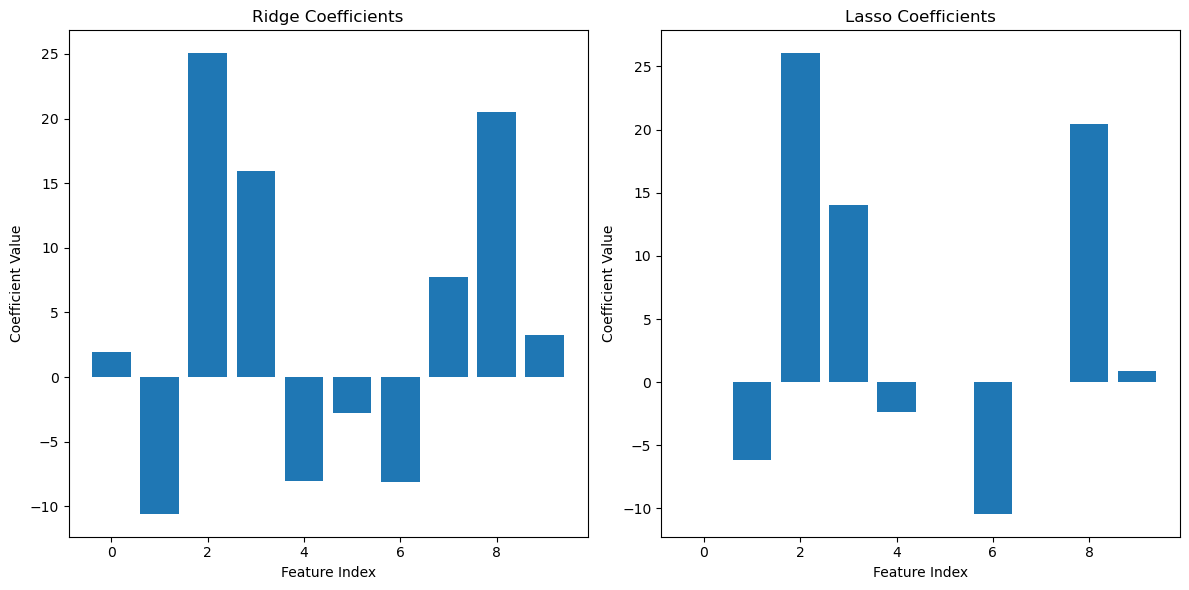

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for scaling and applying LinearRegression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train the LinearRegression model
pipeline_lr.fit(X_train, y_train)

# Evaluate the LinearRegression model
score_lr = pipeline_lr.score(X_test, y_test)
print(f"LinearRegression R^2 score: {score_lr:.4f}")

# Create a pipeline for scaling and applying Ridge with Grid Search
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

# Define the grid of hyperparameters
param_grid_ridge = {'model__alpha': np.logspace(-4, 4, 10)}

# Perform Grid Search for Ridge
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=10, scoring='r2')
grid_search_ridge.fit(X_train, y_train)

# Print best parameters and score
print(f"Best Ridge alpha: {grid_search_ridge.best_params_['model__alpha']:.4f}")
print(f"Best Ridge R^2 score: {grid_search_ridge.best_score_:.4f}")

# Get the coefficients for Ridge
ridge_best_model = grid_search_ridge.best_estimator_
ridge_coefficients = ridge_best_model.named_steps['model'].coef_

# Create a pipeline for scaling and applying Lasso with Grid Search
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

# Define the grid of hyperparameters
param_grid_lasso = {'model__alpha': np.logspace(-4, 4, 10)}

# Perform Grid Search for Lasso
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=10, scoring='r2')
grid_search_lasso.fit(X_train, y_train)

# Print best parameters and score
print(f"Best Lasso alpha: {grid_search_lasso.best_params_['model__alpha']:.4f}")
print(f"Best Lasso R^2 score: {grid_search_lasso.best_score_:.4f}")

# Get the coefficients for Lasso
lasso_best_model = grid_search_lasso.best_estimator_
lasso_coefficients = lasso_best_model.named_steps['model'].coef_

# Plot the coefficients
plt.figure(figsize=(12, 6))

# Plot Ridge coefficients
plt.subplot(1, 2, 1)
plt.bar(range(len(ridge_coefficients)), ridge_coefficients)
plt.title('Ridge Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

# Plot Lasso coefficients
plt.subplot(1, 2, 2)
plt.bar(range(len(lasso_coefficients)), lasso_coefficients)
plt.title('Lasso Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()


In [5]:
# ridge keeps all and minimizes correlation and lasso will use 0 alpha to feature select correlated columns